In [44]:
import json
import spotipy as spot
import pandas as pd

In [45]:
# Use Hydra later
config = json.load(open(file="config.json", encoding="utf-8"))
config

{'CLIENT_ID': '468b8b024bfb41d5b1957dad2afc766a',
 'CLIENT_SECRET': '8827668f8ed64f13bf8c2e83781c3997',
 'REDIRECT_URI': 'http://localhost:8080'}

In [46]:
scope = "user-read-recently-played"

In [47]:
auth = spot.SpotifyOAuth(client_id=config["CLIENT_ID"],
    client_secret=config["CLIENT_SECRET"],
    redirect_uri=config["REDIRECT_URI"])

In [48]:
sp = spot.Spotify(auth_manager=auth)

In [49]:
results = sp.current_user_recently_played()

In [50]:
play_count = {}
for item in results['items']:
    track = item['track']
    artist = track['artists'][0]['name']
    if artist in play_count:
        play_count[artist]+=1
    else:
        play_count[artist]=1

In [51]:
df = pd.DataFrame.from_dict(play_count, orient='index')
df.columns = ['Play Count']
df.sort_values(by='Play Count', inplace=True, ascending=False)
df.head()

,Play Count
Jack Harlow,7
Logic,4
EARTHGANG,2
Trey Songz,1
FYKE,1


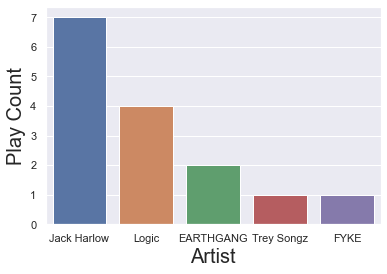

<Figure size 2160x2160 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5 = df.head()

sns.set()
sns.barplot(x=top_5.index, y=top_5['Play Count'])

plt.xlabel("Artist", fontsize=20)
plt.ylabel("Play Count", fontsize=20)
plt.figure(figsize=(30,30))

plt.show()

In [53]:
tracks = []
unique = []
for item in results['items']:
    track = item['track']
    if track['name'] in unique:
        continue
    info = [track['name'], track['album']['name'], track['artists'][0]['name']]
    tracks.append(info)
    unique.append(track['name'])
print(tracks[0])

['Heart Attack', 'Chapter V (Deluxe)', 'Trey Songz']


In [54]:
tracks_df = pd.DataFrame(tracks, columns=['Name', 'Album', 'Artist'])
tracks_df.head()

,Name,Album,Artist
0,Heart Attack,Chapter V (Deluxe),Trey Songz
1,Space Ghost Coast To Coast (with Bree Runway),Space Ghost Coast To Coast (with Bree Runway),Glass Animals
2,Run It,The Incredible True Story,Logic
3,Like Woah,The Incredible True Story,Logic
4,Be a Toy,Spring Songs,Title Fight


In [55]:
tracks_df[tracks_df['Artist'].str[0]=='E']

,Name,Album,Artist
39,POWER (with CeeLo Green & Nick Cannon),GHETTO GODS,EARTHGANG
40,ALL EYES ON ME,GHETTO GODS,EARTHGANG


In [56]:
results.keys()

dict_keys(['items', 'next', 'cursors', 'limit', 'href'])

In [57]:
print(results['items'][0].keys())
print(len(results['items']))

dict_keys(['track', 'played_at', 'context'])
50


In [58]:
item_dict = results['items'][0]

In [59]:
item_dict['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [60]:
item_dict['track']['id']

'25CA8QVJQrh5R05UUCaODM'

In [61]:
item_dict['track']['artists'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/2iojnBLj0qIMiKPvVhLnsH'},
 'href': 'https://api.spotify.com/v1/artists/2iojnBLj0qIMiKPvVhLnsH',
 'id': '2iojnBLj0qIMiKPvVhLnsH',
 'name': 'Trey Songz',
 'type': 'artist',
 'uri': 'spotify:artist:2iojnBLj0qIMiKPvVhLnsH'}

In [62]:
item_dict['track']['name']

'Heart Attack'

In [63]:
item_dict['track']['album']

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2iojnBLj0qIMiKPvVhLnsH'},
   'href': 'https://api.spotify.com/v1/artists/2iojnBLj0qIMiKPvVhLnsH',
   'id': '2iojnBLj0qIMiKPvVhLnsH',
   'name': 'Trey Songz',
   'type': 'artist',
   'uri': 'spotify:artist:2iojnBLj0qIMiKPvVhLnsH'}],
 'available_markets': ['AD',
  'AE',
  'AG',
  'AO',
  'AR',
  'AU',
  'BB',
  'BD',
  'BF',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BW',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EG',
  'ES',
  'FI',
  'FR',
  'GA',
  'GD',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'HK',
  'HN',
  'HT',
  'ID',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'KE',
  'KH',
  'KM',
  'KN',
  'KR',
  'KW',
  'LA',
  'LB',
  'LC',
  'LK',
  'LR',
  'LS',
  'LY',
  'MA',
  'MC',
  'MG',
  'ML',
  'MO',
  'MR',
  'MT',
  'MU',
  'MW',

In [64]:
item_dict['track']['explicit']

True

In [65]:
item_dict['track']['duration_ms']

233146

In [66]:
item_dict['track']['popularity']

57

In [67]:
item_dict['track']['is_local']

False

In [68]:
def get_info(track):
    track_id = track['id']
    song_name = track['name']
    album_id = track['album']['id']
    album_name = track['album']['name']
    artist_id = track['artists'][0]['id']
    artist_name = track['artists'][0]['name']
    explicit = track['explicit']
    duration = track['duration_ms']
    song_popularity = track['popularity']
    album_release_date = track['album']['release_date']
    return [track_id, song_name, album_id, album_name, artist_id,
        artist_name, explicit, duration, song_popularity, album_release_date]

In [69]:
all_tracks = []
for item in results['items']:
    all_tracks.append(get_info(item['track']))

In [70]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
tracks_df = pd.DataFrame(all_tracks, columns=headers)
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,25CA8QVJQrh5R05UUCaODM,Heart Attack,24IexOT10jPuK3MR6cS3ag,Chapter V (Deluxe),2iojnBLj0qIMiKPvVhLnsH,Trey Songz,True,233146,57,2012-08-17
1,4mjV2VrBj1vAOV8dFlXs7i,Space Ghost Coast To Coast (with Bree Runway),4w5ziqDWymHVdTz2Hd3BRN,Space Ghost Coast To Coast (with Bree Runway),4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,True,175869,45,2021-05-20
2,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13
3,6bM3GKo47KVgvj3gHdWS0U,Like Woah,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,232693,57,2015-11-13
4,1rqVob8GLwcVIuBQEHA6aV,Be a Toy,4cLYG7fp8Z7OyzlSEV6HED,Spring Songs,2CnhqfjUG0qzsru0SMuhrk,Title Fight,True,184456,33,2013-11-12


In [71]:
tracks_df['Analysis'] = sp.audio_features(tracks_df['Track ID'].to_list())
tracks_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,Analysis
0,25CA8QVJQrh5R05UUCaODM,Heart Attack,24IexOT10jPuK3MR6cS3ag,Chapter V (Deluxe),2iojnBLj0qIMiKPvVhLnsH,Trey Songz,True,233146,57,2012-08-17,"{'danceability': 0.608, 'energy': 0.863, 'key'..."
1,4mjV2VrBj1vAOV8dFlXs7i,Space Ghost Coast To Coast (with Bree Runway),4w5ziqDWymHVdTz2Hd3BRN,Space Ghost Coast To Coast (with Bree Runway),4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,True,175869,45,2021-05-20,"{'danceability': 0.828, 'energy': 0.518, 'key'..."
2,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13,"{'danceability': 0.863, 'energy': 0.815, 'key'..."
3,6bM3GKo47KVgvj3gHdWS0U,Like Woah,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,232693,57,2015-11-13,"{'danceability': 0.717, 'energy': 0.907, 'key'..."
4,1rqVob8GLwcVIuBQEHA6aV,Be a Toy,4cLYG7fp8Z7OyzlSEV6HED,Spring Songs,2CnhqfjUG0qzsru0SMuhrk,Title Fight,True,184456,33,2013-11-12,"{'danceability': 0.443, 'energy': 0.99, 'key':..."


In [72]:
jsoned_tracks = pd.json_normalize(tracks_df['Analysis'])
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.608,0.863,11,-4.870,1,0.1310,0.059300,0.00000,0.2280,0.476,150.029,audio_features,25CA8QVJQrh5R05UUCaODM,spotify:track:25CA8QVJQrh5R05UUCaODM,https://api.spotify.com/v1/tracks/25CA8QVJQrh5...,https://api.spotify.com/v1/audio-analysis/25CA...,233147,4
1,0.828,0.518,8,-9.244,1,0.0811,0.048100,0.00007,0.1070,0.292,100.952,audio_features,4mjV2VrBj1vAOV8dFlXs7i,spotify:track:4mjV2VrBj1vAOV8dFlXs7i,https://api.spotify.com/v1/tracks/4mjV2VrBj1vA...,https://api.spotify.com/v1/audio-analysis/4mjV...,175870,4
2,0.863,0.815,11,-6.242,0,0.2320,0.216000,0.00000,0.0887,0.636,108.972,audio_features,4iq3zHwgHSxstFvYw4yIsQ,spotify:track:4iq3zHwgHSxstFvYw4yIsQ,https://api.spotify.com/v1/tracks/4iq3zHwgHSxs...,https://api.spotify.com/v1/audio-analysis/4iq3...,200800,4
3,0.717,0.907,4,-4.457,0,0.0389,0.035000,0.00696,0.5940,0.401,107.051,audio_features,6bM3GKo47KVgvj3gHdWS0U,spotify:track:6bM3GKo47KVgvj3gHdWS0U,https://api.spotify.com/v1/tracks/6bM3GKo47KVg...,https://api.spotify.com/v1/audio-analysis/6bM3...,232693,4
4,0.443,0.990,9,-4.608,1,0.0735,0.000549,0.83500,0.2720,0.200,129.680,audio_features,1rqVob8GLwcVIuBQEHA6aV,spotify:track:1rqVob8GLwcVIuBQEHA6aV,https://api.spotify.com/v1/tracks/1rqVob8GLwcV...,https://api.spotify.com/v1/audio-analysis/1rqV...,184456,4


In [73]:
jsoned_tracks.sort_values(by=['danceability'], ascending=False, inplace=True)
jsoned_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
5,0.946,0.520,1,-3.309,1,0.1340,0.0110,0.000006,0.0814,0.859,139.950,audio_features,7rf7lJOYCRFpWnbRJE4C1w,spotify:track:7rf7lJOYCRFpWnbRJE4C1w,https://api.spotify.com/v1/tracks/7rf7lJOYCRFp...,https://api.spotify.com/v1/audio-analysis/7rf7...,116805,4
45,0.914,0.520,2,-8.247,0,0.3300,0.4830,0.000000,0.0937,0.485,90.003,audio_features,6NxpWAcnqCE6J9pVyLZLeQ,spotify:track:6NxpWAcnqCE6J9pVyLZLeQ,https://api.spotify.com/v1/tracks/6NxpWAcnqCE6...,https://api.spotify.com/v1/audio-analysis/6Nxp...,240289,4
38,0.909,0.393,7,-11.584,0,0.0546,0.0859,0.067100,0.1070,0.476,113.008,audio_features,1y8mzjIXRFlfPjCpyZiu3A,spotify:track:1y8mzjIXRFlfPjCpyZiu3A,https://api.spotify.com/v1/tracks/1y8mzjIXRFlf...,https://api.spotify.com/v1/audio-analysis/1y8m...,208000,4
27,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4
22,0.905,0.563,8,-6.135,1,0.1020,0.0254,0.000010,0.1130,0.324,106.998,audio_features,1rDQ4oMwGJI7B4tovsBOxc,spotify:track:1rDQ4oMwGJI7B4tovsBOxc,https://api.spotify.com/v1/tracks/1rDQ4oMwGJI7...,https://api.spotify.com/v1/audio-analysis/1rDQ...,173948,4


In [74]:
merged_df = pd.merge(tracks_df, jsoned_tracks, how='inner', left_on='Track ID', right_on='id')
merged_df.drop(['Analysis'], inplace=True, axis=1)
merged_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,25CA8QVJQrh5R05UUCaODM,Heart Attack,24IexOT10jPuK3MR6cS3ag,Chapter V (Deluxe),2iojnBLj0qIMiKPvVhLnsH,Trey Songz,True,233146,57,2012-08-17,...,0.2280,0.476,150.029,audio_features,25CA8QVJQrh5R05UUCaODM,spotify:track:25CA8QVJQrh5R05UUCaODM,https://api.spotify.com/v1/tracks/25CA8QVJQrh5...,https://api.spotify.com/v1/audio-analysis/25CA...,233147,4
1,4mjV2VrBj1vAOV8dFlXs7i,Space Ghost Coast To Coast (with Bree Runway),4w5ziqDWymHVdTz2Hd3BRN,Space Ghost Coast To Coast (with Bree Runway),4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,True,175869,45,2021-05-20,...,0.1070,0.292,100.952,audio_features,4mjV2VrBj1vAOV8dFlXs7i,spotify:track:4mjV2VrBj1vAOV8dFlXs7i,https://api.spotify.com/v1/tracks/4mjV2VrBj1vA...,https://api.spotify.com/v1/audio-analysis/4mjV...,175870,4
2,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13,...,0.0887,0.636,108.972,audio_features,4iq3zHwgHSxstFvYw4yIsQ,spotify:track:4iq3zHwgHSxstFvYw4yIsQ,https://api.spotify.com/v1/tracks/4iq3zHwgHSxs...,https://api.spotify.com/v1/audio-analysis/4iq3...,200800,4
3,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13,...,0.0887,0.636,108.972,audio_features,4iq3zHwgHSxstFvYw4yIsQ,spotify:track:4iq3zHwgHSxstFvYw4yIsQ,https://api.spotify.com/v1/tracks/4iq3zHwgHSxs...,https://api.spotify.com/v1/audio-analysis/4iq3...,200800,4
4,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13,...,0.0887,0.636,108.972,audio_features,4iq3zHwgHSxstFvYw4yIsQ,spotify:track:4iq3zHwgHSxstFvYw4yIsQ,https://api.spotify.com/v1/tracks/4iq3zHwgHSxs...,https://api.spotify.com/v1/audio-analysis/4iq3...,200800,4


In [75]:
artist_freq = merged_df.groupby(['Artist ID'])['Artist ID'].count()
top_5_artist_ids = artist_freq.nlargest(5).index.to_list()
top_5_artist_ids

['2LIk90788K0zvyj2JJVwkJ',
 '4xRYI6VqpkE3UwrDrAZL8L',
 '5MbNzCW3qokGyoo9giHA3V',
 '02DBFa1jp5WLRo71ttC5Q8',
 '0RpddSzUHfncUWNJXKOsjy']

In [76]:
song_freq = merged_df.groupby(['Track ID'])['Track ID'].count()
top_5_track_ids = song_freq.nlargest(5).index.to_list()
top_5_track_ids

['1rDQ4oMwGJI7B4tovsBOxc',
 '4iq3zHwgHSxstFvYw4yIsQ',
 '0ERnYArznxdTBEIj1VSta8',
 '0LcsvJQSFIQo3RjNhPcYqT',
 '0M52bTppxI3QQxan8ftIsY']

In [77]:
danceability_df = merged_df.set_index('danceability')
danceability_df.sort_index(inplace=True, ascending=False)
danceability_df[['Song Name', 'Artist Name']].head()

,Song Name,Artist Name
danceability,,
0.946,I Have a Dream,Shelley FKA DRAM
0.914,ALL EYES ON ME,EARTHGANG
0.909,the broken hearts club,ZZ
0.905,First Class,Jack Harlow
0.905,First Class,Jack Harlow


In [78]:
danceability_df.columns

Index(['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
       'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
       'Album Release Date', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [79]:
genre_seeds = sp.recommendation_genre_seeds()
genres = genre_seeds['genres']
print(genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [80]:
seed_genres = ['summer']
recommended = sp.recommendations(top_5_artist_ids)
recommended['tracks'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [81]:
all_recommended = []
for item in recommended['tracks']:
    all_recommended.append(get_info(item))

In [82]:
headers = ['Track ID', 'Song Name', 'Album ID', 'Album Name', 'Artist ID',
    'Artist Name', 'Explicit', 'Duration', 'Song Popularity',
    'Album Release Date']
recommended_df = pd.DataFrame(all_tracks, columns=headers)
recommended_df.head()

,Track ID,Song Name,Album ID,Album Name,Artist ID,Artist Name,Explicit,Duration,Song Popularity,Album Release Date
0,25CA8QVJQrh5R05UUCaODM,Heart Attack,24IexOT10jPuK3MR6cS3ag,Chapter V (Deluxe),2iojnBLj0qIMiKPvVhLnsH,Trey Songz,True,233146,57,2012-08-17
1,4mjV2VrBj1vAOV8dFlXs7i,Space Ghost Coast To Coast (with Bree Runway),4w5ziqDWymHVdTz2Hd3BRN,Space Ghost Coast To Coast (with Bree Runway),4yvcSjfu4PC0CYQyLy4wSq,Glass Animals,True,175869,45,2021-05-20
2,4iq3zHwgHSxstFvYw4yIsQ,Run It,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,200800,55,2015-11-13
3,6bM3GKo47KVgvj3gHdWS0U,Like Woah,5dOpbgAmJeyoakKQ0QLWkR,The Incredible True Story,4xRYI6VqpkE3UwrDrAZL8L,Logic,True,232693,57,2015-11-13
4,1rqVob8GLwcVIuBQEHA6aV,Be a Toy,4cLYG7fp8Z7OyzlSEV6HED,Spring Songs,2CnhqfjUG0qzsru0SMuhrk,Title Fight,True,184456,33,2013-11-12


In [83]:
tracks_df['Song Name'].unique()

array(['Heart Attack', 'Space Ghost Coast To Coast (with Bree Runway)',
       'Run It', 'Like Woah', 'Be a Toy', 'I Have a Dream',
       'Forrest Gump', 'Rigamortus', 'Woah (feat. Jeremih)',
       'First Class', 'ACID TRIP',
       'Headfirst Slide Into Cooperstown On A Bad Bet',
       'Everyday We Lit (feat. PnB Rock)', 'Paralyzer', 'No Cap', '66',
       'Weightless', 'verbatim', 'Black Hearted',
       'acting like that (feat. Machine Gun Kelly)', 'Everybody Talks',
       'Rari (feat. Future)', 'Deleter', 'Come Down', 'Super',
       'OUT FRONT', 'Controlla', 'Coldest Nights', 'Blessed',
       'Vanilla Sky (with Wrabel)', 'Flying', 'JINJA',
       'Someone That I Used To Know', 'the broken hearts club', 'Let Go',
       'Everyday', "It's not me, It's you.", 'Vacation', 'Brown Sugar',
       'POWER (with CeeLo Green & Nick Cannon)', 'ALL EYES ON ME',
       'Luv Is Dro (feat. Static Major & Bryson Tiller)', 'man i is',
       'Today I Saw The Whole World', 'The Force Theme'], d

In [84]:
# song = danceability_df[danceability_df['Song Name']=='The Force Theme']
song = danceability_df.drop_duplicates()
song = song.head(10)
song.loc[:, ('energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Song Name', 'Artist Name')]
# song.columns

,energy,acousticness,instrumentalness,liveness,valence,Song Name,Artist Name
danceability,,,,,,,
0.946,0.520,0.0110,0.000006,0.0814,0.859,I Have a Dream,Shelley FKA DRAM
0.914,0.520,0.4830,0.000000,0.0937,0.485,ALL EYES ON ME,EARTHGANG
0.909,0.393,0.0859,0.067100,0.1070,0.476,the broken hearts club,ZZ
0.905,0.563,0.0254,0.000010,0.1130,0.324,First Class,Jack Harlow
0.899,0.695,0.1130,0.000000,0.1120,0.394,Super,Cordae
0.896,0.483,0.0904,0.000218,0.0889,0.510,OUT FRONT,Jack Harlow
0.863,0.815,0.2160,0.000000,0.0887,0.636,Run It,Logic
0.852,0.554,0.0945,0.000429,0.1280,0.656,No Cap,Blake and Miles
0.841,0.898,0.2710,0.015100,0.3040,0.931,Come Down,Anderson .Paak
